In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

# 图像阈值
<br>
ret,dst = cv2.threshold(src,thresh,maxval,type)
<br>
ret:True或False，代表有没有读到图片
<br>
dst:目标图像
<br>
--src:输入图
<br>
--dst:输出图
<br>
--thresh:阈值
<br>
--maxval:当像素超过阈值或小于阈值时(由type决定)所赋值
<br>
--type:二值化操作的类型如下
<br>
cv2.THRESH_BINARY:&ensp;&ensp;&ensp;&ensp;&ensp;超过阈值部分取maxval，否则取0
<br>
cv2.THRESH_BINARY_INV:&ensp;THRESH_BINARY的反转
<br>
cv2.THRESH_TRUNC:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;大于阈值部分设为阈值，否则不变
<br>
cv2.THRESH_TOZERO:&ensp;&ensp;&ensp;&ensp;&ensp;大于阈值部分不变，否则设为0
<br>
cv2.THRESH_TOZERO_INV:&ensp;THRESH_TOZERO的反转

In [2]:
img = cv2.imread('../0-Datas/images/huidulena.jpg')
ret,thresh1=cv2.threshold(img,127,255,cv2.THRESH_BINARY) #超过127部分取255，否则为0，即偏向白的更白，偏向黑的更黑
ret,thresh2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV) #超过127部分取0，否则为255，即偏向黑的变白，偏向白的变黑
ret,thresh3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC) #超过127的为127，否则不变，即偏向白的不白不黑，偏向黑的不变
ret,thresh4=cv2.threshold(img,127,255,cv2.THRESH_TOZERO) #超过127的不变，否则为0，即偏向黑的更黑，偏向白的不变
ret,thresh5=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV) #超过127的为0，否则不变，即偏向白的变黑，偏向黑的不变

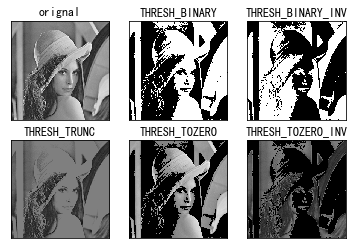

In [3]:
titles=['orignal','THRESH_BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images=[img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

# 图像平滑
<br>

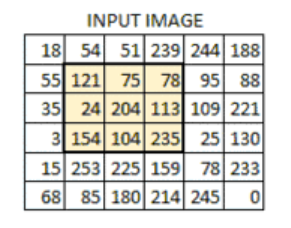

In [6]:
img = cv2.imread('../0-Datas/images/lenaNoise.png')
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#均值滤波（9个值加起来除以9）
blur = cv2.blur(img,(3,3)) #3乘3的卷积核

cv2.imshow('blur',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
#方框滤波
#基本和均值一样，选择归一化
box = cv2.boxFilter(img,-1,(3,3),normalize=True)

cv2.imshow('box',box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
#方框滤波（容易越界,处理为255）
#基本和均值一样，选择不归一化
box2 = cv2.boxFilter(img,-1,(3,3),normalize=False)

cv2.imshow('box2',box2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
#高斯滤波（更重视中间的）
aussian = cv2.GaussianBlur(img,(5,5),1) #离得越近，关系越紧密

cv2.imshow('aussian',aussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#中指滤波（相当于用中指替换）
median = cv2.medianBlur(img,5)

cv2.imshow('median',median)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
#展示所有的
allimg = np.hstack((img,blur,aussian,median))

cv2.imshow('allimg',allimg)
cv2.waitKey(0)
cv2.destroyAllWindows()